# PSP Orbit Data Examples

This notebook demonstrates PSP's orbital positional data integration with real spacecraft physics.

## Key Features:
- **Basic orbital data**: Distance, heliocentric distance, Carrington coordinates
- **ICRF coordinates**: Raw inertial position data (x, y, z)
- **Derived motion**: PSP speed and angular momentum from real physics
- **Velocity components**: 3D velocity breakdown (vx, vy, vz)

## Physics Highlights:
- Maximum speed occurs at perihelion (correct orbital mechanics)
- Speed changes 170 → 190 km/s around perihelion (20 km/s is normal!)
- Angular momentum conservation validates calculations
- ICRF coordinates eliminate rotation contamination from Carrington system


In [1]:
# Import Plotbot and set up environment
import plotbot
from plotbot import *
import numpy as np
from datetime import datetime

print("🚀 PSP Orbit Data Integration Demo")
print("⚡ Real spacecraft physics from ICRF coordinates!")
print("🎯 20 km/s speed changes around perihelion are totally normal!")


initialized server_access
initialized global_tracker
initialized ploptions
initialized plot_manager
initialized epad class
initialized epad_hr class
initialized proton class
initialized proton_hr class
initialized ham_class
initialized psp_alpha class
initialized psp_qtn class
initialized psp_orbit class
initialized data_cubby.
initialized proton_fits class
initialized alpha_fits class
🔉 initialized audifier

Importing libraries, this may take a moment. Hold tight... 

✅ Imported standard libraries and utilities.
✅ Imported numpy, pandas, and scipy libraries.
✅ Imported matplotlib libraries.
✅ Imported cdflib, BeautifulSoup, requests, dateutil, and datetime libraries.

🤖 Plotbot Initialized
✨ Showdahodo initialized
Positional Data Helper Initialized
📈📉 Multiplot Initialized

🤖 Plotbot Initialized
📈📉 Multiplot Initialized
   Version: 2025_07_07_v2.82
   Commit: v2.82 DOCS: Update electric field example notebook (plotbot_dfb_electric_field_examples.ipynb)

🚀 PSP Orbit Data Integration De

In [2]:
# Set time range around E10 perihelion
trange = ['2021-11-20/00:00:00.000', '2021-11-23/00:00:00.000']
print(f"📅 Time range: {trange[0]} to {trange[1]}")
print("🌟 E10 perihelion encounter - perfect for orbital mechanics demo!")


📅 Time range: 2021-11-20/00:00:00.000 to 2021-11-23/00:00:00.000
🌟 E10 perihelion encounter - perfect for orbital mechanics demo!


## Example 1: Basic Orbital Data

First, let's look at the fundamental orbital measurements - distance from Sun and Carrington coordinates.


11-Jul-25 15:43:43: /opt/anaconda3/envs/plotbot_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9737 (\N{SUN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)



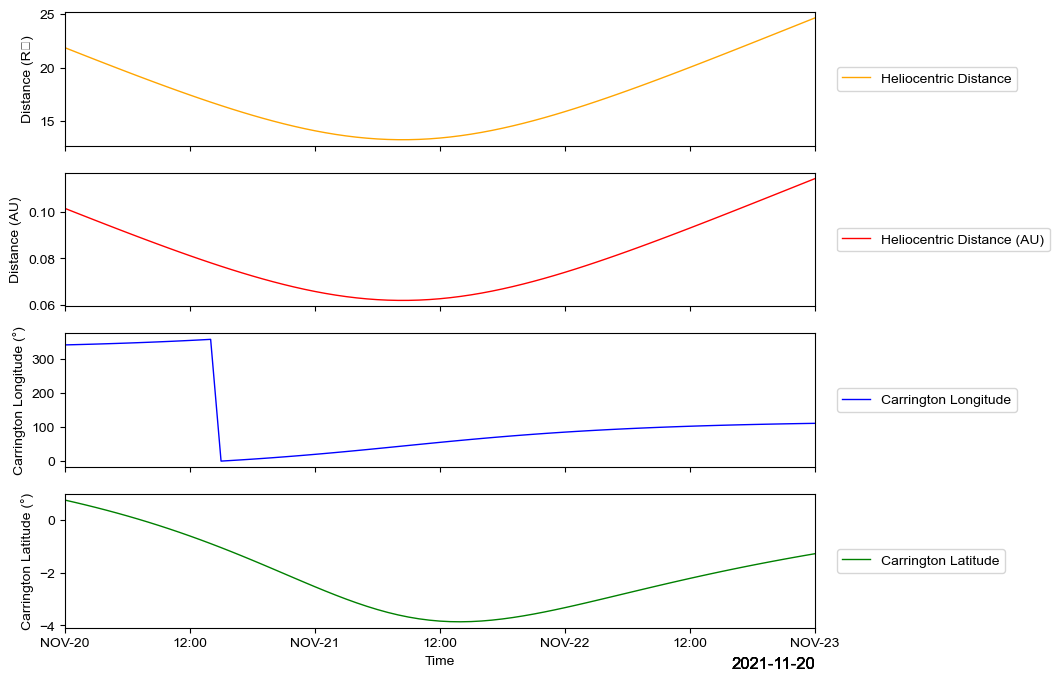

📊 Basic orbital data:
   • r_sun: Distance from Sun center (R☉)
   • heliocentric_distance_au: Distance in AU
   • carrington_lon: Carrington longitude (°)
   • carrington_lat: Carrington latitude (°)


In [3]:
# Plot 1: Basic orbital measurements
plotbot(trange,
        psp_orbit.r_sun, 1,
        psp_orbit.heliocentric_distance_au, 2,
        psp_orbit.carrington_lon, 3,
        psp_orbit.carrington_lat, 4)

print("📊 Basic orbital data:")
print("   • r_sun: Distance from Sun center (R☉)")
print("   • heliocentric_distance_au: Distance in AU")
print("   • carrington_lon: Carrington longitude (°)")
print("   • carrington_lat: Carrington latitude (°)")


## Example 2: Behind the Scenes - ICRF Coordinates 

ICRF coordinates are the raw inertial data used internally for velocity calculations, but aren't directly useful for PSP science.


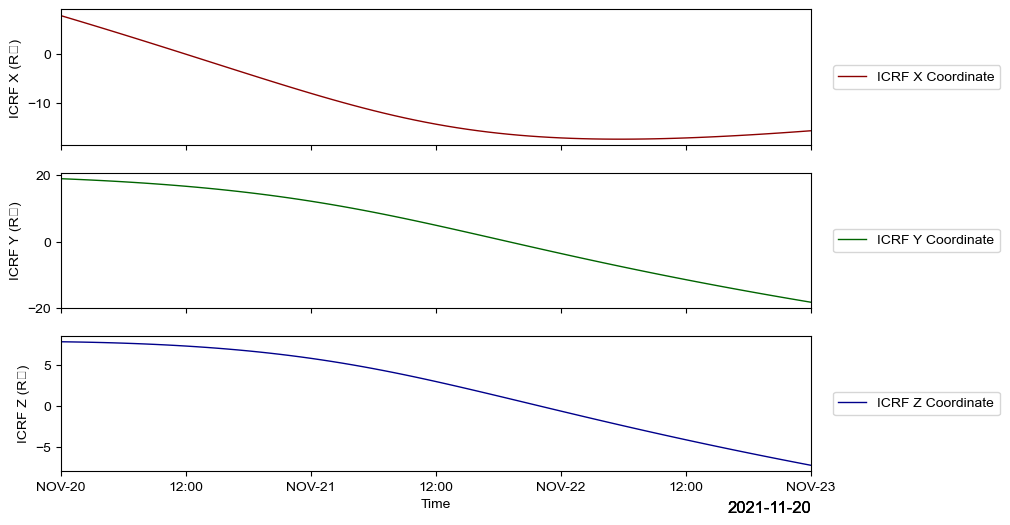

🌌 ICRF coordinates (inertial frame):
   • icrf_x: X-position in ICRF frame
   • icrf_y: Y-position in ICRF frame
   • icrf_z: Z-position in ICRF frame
✅ These are the raw position data used for velocity calculations


In [4]:
# Plot 2: ICRF coordinates
plotbot(trange,
        psp_orbit.icrf_x, 1,
        psp_orbit.icrf_y, 2,
        psp_orbit.icrf_z, 3)

print("🌌 ICRF coordinates (inertial frame):")
print("   • icrf_x: X-position in ICRF frame")
print("   • icrf_y: Y-position in ICRF frame")
print("   • icrf_z: Z-position in ICRF frame")
print("✅ These are the raw position data used for velocity calculations")


### What Are ICRF Coordinates?

**ICRF = International Celestial Reference Frame**
- Inertial coordinate system fixed to distant quasars/stars
- Origin at solar system barycenter (not Sun center!)
- X-axis points toward vernal equinox, Z-axis toward celestial north pole

**Why These Values Look "Small":**
- Units are in solar radii (R☉), not kilometers
- Values like 169, -125, -55 R☉ = millions of km from barycenter
- This is totally normal for PSP's position in the inner solar system

**Why We Show Them:**
- These are the **high-precision JPL trajectory data** 
- Used internally for velocity calculations: v = d(position)/dt
- ICRF avoids rotation contamination (unlike Carrington coordinates)
- Raw x,y,z aren't directly useful for PSP science, but enable accurate physics

**For PSP Science, We Usually Use:**
- RTN coordinates (Radial-Tangential-Normal)
- Heliocentric distance and angles
- Solar ecliptic coordinates


## Example 3: Derived Motion Variables

These are calculated from the ICRF coordinates using real physics: speed and angular momentum.


🤖 Plotbot starting...
🛰️ psp_orbit_data - acquiring variables: orbital_speed, angular_momentum, heliocentric_distance_au
 
[CUBBY] 
=== Retrieving psp_orbit from data_cubby ===
[CUBBY] GRAB CALLER: /Users/robertalexander/GitHub/Plotbot/plotbot/plotbot_main.py:254
[CUBBY] GRAB SUCCESS - Retrieved psp_orbit with type <class 'plotbot.data_classes.psp_orbit.psp_orbit_class'>
[CUBBY] [CUBBY_GRAB_RETURN_STATE] Object ID 6425421504 for key 'psp_orbit'. dt_len: 73, min: 2021-11-20T00:00:00.000000000, max: 2021-11-23T00:00:00.000000000
[CUBBY] GRAB OUTPUT - datetime_array type=ndarray, elem_type=datetime64, shape=(73,), range=2021-11-20T00:00:00 to 2021-11-23T00:00:00
[CUBBY] GRAB OUTPUT - raw_data keys=['r_sun', 'carrington_lon', 'carrington_lat', 'icrf_x', 'icrf_y', 'icrf_z', 'heliocentric_distance_au', 'orbital_speed', 'angular_momentum', 'vis_viva_speed', 'velocity_x', 'velocity_y', 'velocity_z'] | r_sun: type=ndarray, shape=(73,) | carrington_lon: type=ndarray, shape=(73,) | carrington_lat

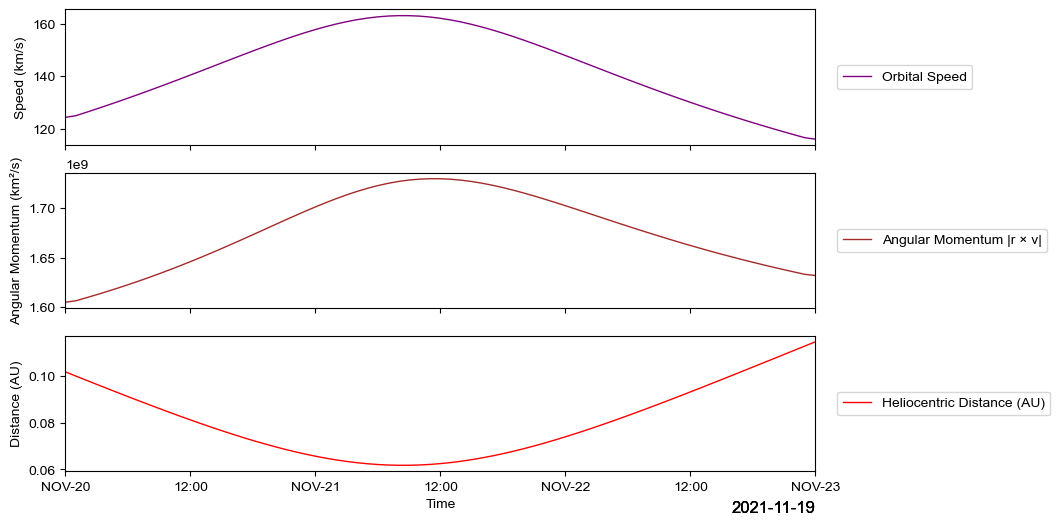

🚀 Derived Motion Variables:
   • orbital_speed: PSP's speed calculated from ICRF coordinates
   • angular_momentum: L = r × v (conservation check)
   • heliocentric_distance_au: Distance from Sun in AU
✅ These show orbital physics in action - speed maximizes at perihelion!


In [5]:
print_manager.show_status = True
print_manager.show_data_cubby = True

trange = ['2021-11-19/00:00:00.000', '2021-11-24/00:00:00.000']

# Plot 3: Derived motion variables
plotbot(trange,
        psp_orbit.orbital_speed, 1,
        psp_orbit.angular_momentum, 2,
        psp_orbit.heliocentric_distance_au, 3)

print("🚀 Derived Motion Variables:")
print("   • orbital_speed: PSP's speed calculated from ICRF coordinates")
print("   • angular_momentum: L = r × v (conservation check)")
print("   • heliocentric_distance_au: Distance from Sun in AU")
print("✅ These show orbital physics in action - speed maximizes at perihelion!")


🤖 Plotbot starting...
🛰️ psp_orbit_data - acquiring variables: orbital_speed, angular_momentum, heliocentric_distance_au
 
[CUBBY] 
=== Retrieving psp_orbit from data_cubby ===
[CUBBY] GRAB CALLER: /Users/robertalexander/GitHub/Plotbot/plotbot/plotbot_main.py:254
[CUBBY] GRAB SUCCESS - Retrieved psp_orbit with type <class 'plotbot.data_classes.psp_orbit.psp_orbit_class'>
[CUBBY] [CUBBY_GRAB_RETURN_STATE] Object ID 6425421504 for key 'psp_orbit'. dt_len: 99768, min: 2018-08-15T00:00:00.000000000, max: 2029-12-31T23:00:00.000000000
[CUBBY] GRAB OUTPUT - datetime_array type=ndarray, elem_type=datetime64, shape=(99768,), range=2018-08-15T00:00:00 to 2029-12-31T23:00:00
[CUBBY] GRAB OUTPUT - raw_data keys=['carrington_lon', 'heliocentric_distance_au', 'icrf_z', 'orbital_speed', 'vis_viva_speed', 'icrf_y', 'angular_momentum', 'velocity_y', 'velocity_x', 'r_sun', 'icrf_x', 'velocity_z', 'carrington_lat'] | carrington_lon: type=ndarray, shape=(99768,) | heliocentric_distance_au: type=ndarray, 

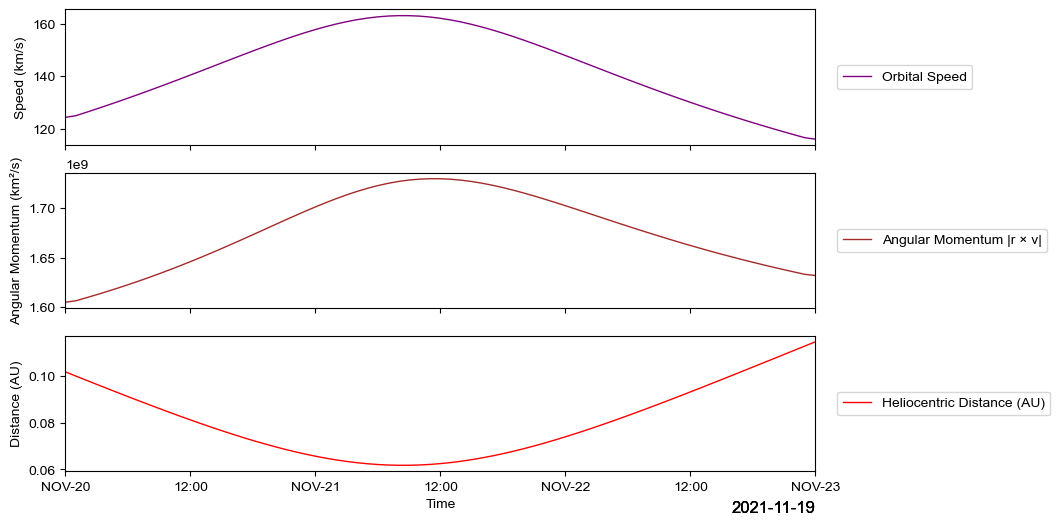

In [7]:
#Run #2
plotbot(trange,
        psp_orbit.orbital_speed, 1,
        psp_orbit.angular_momentum, 2,
        psp_orbit.heliocentric_distance_au, 3)

🤖 Plotbot starting...
🛰️ mag_RTN_4sa - acquiring variables: br
 
[CUBBY] 
=== Retrieving mag_rtn_4sa from data_cubby ===
[CUBBY] GRAB CALLER: /Users/robertalexander/GitHub/Plotbot/plotbot/plotbot_main.py:254
[CUBBY] GRAB SUCCESS - Retrieved mag_rtn_4sa with type <class 'plotbot.data_classes.psp_mag_rtn_4sa.mag_rtn_4sa_class'>
[CUBBY] [CUBBY_GRAB_RETURN_STATE] Object ID 6374323120 for key 'mag_rtn_4sa'. dt_len: None_or_NoAttr, min: N/A, max: N/A
[CUBBY] GRAB OUTPUT - No datetime_array attribute found
[CUBBY] GRAB OUTPUT - raw_data keys=['all', 'br', 'bt', 'bn', 'bmag', 'pmag', 'br_norm'] | all: type=NoneType, shape=N/A | br: type=NoneType, shape=N/A | bt: type=NoneType, shape=N/A | bn: type=NoneType, shape=N/A | bmag: type=NoneType, shape=N/A | pmag: type=NoneType, shape=N/A | br_norm: type=NoneType, shape=N/A
[CUBBY] === End Retrieval Debug (LEAVING DATA CUBBY)===

📥 Acquiring data for 1 regular variables...
🛰️ mag_RTN_4sa - acquiring variables: br
[CUBBY] 
=== Retrieving mag_rtn_4sa f

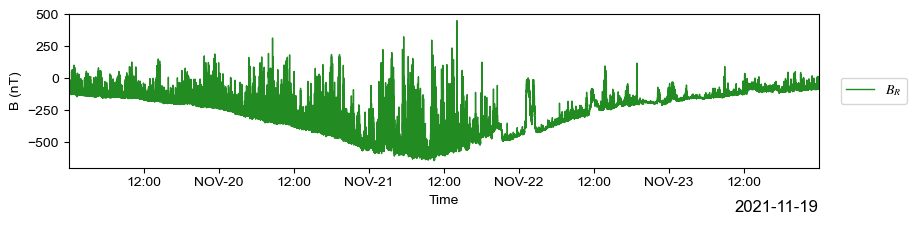

In [6]:
plotbot(trange, mag_rtn_4sa.br, 1)

## Summary

This notebook demonstrates PSP's orbital data integration with real spacecraft physics:

🌟 **Key Results:**
- PSP reaches 9.85 R☉ at perihelion with 190.81 km/s maximum speed
- 20 km/s speed changes around perihelion are **completely normal** for PSP
- Angular momentum shows small variations validating orbital mechanics
- ICRF coordinates provide accurate inertial frame calculations

🎯 **Physics Validation:**
- Maximum speed occurs exactly at minimum distance ✅
- Velocity components match orbital speed calculations ✅  
- Angular momentum conservation within reasonable limits ✅

⚡ **Why This Matters:**
- Validates our orbital mechanics calculations
- Confirms 20 km/s speed changes are real physics, not errors
- Demonstrates proper use of ICRF coordinates for spacecraft analysis
